In [1]:
import numpy as np
from ase.io import read
from ase.spacegroup.symmetrize import FixSymmetry
from calorine.calculators import CPUNEP
from calorine.tools import get_force_constants, relax_structure
from pandas import DataFrame
from phonopy.units import THzToCm
from seekpath import get_explicit_k_path
import phonopy
from matplotlib import pyplot as plt

In [3]:
path = "GXMGRM"
special_points = dict(
    G = [0,0,0],
    M = [1/2, 1/2, 0],
    R = [1/2, 1/2, 1/2],
    X = [0, 1/2, 0]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

In [4]:
phonon_DFT = phonopy.load("BaZrS3_tilt_62/phonons/phonopy/output/phonopy.yaml")
phonon_DFT.run_band_structure([path['explicit_kpoints_rel']])
band_DFT = phonon_DFT.get_band_structure_dict()
df_DFT = DataFrame(band_DFT['frequencies'][0])
df_DFT.index = path['explicit_kpoints_linearcoord']

TypeError: string indices must be integers, not 'str'

NameError: name 'df' is not defined

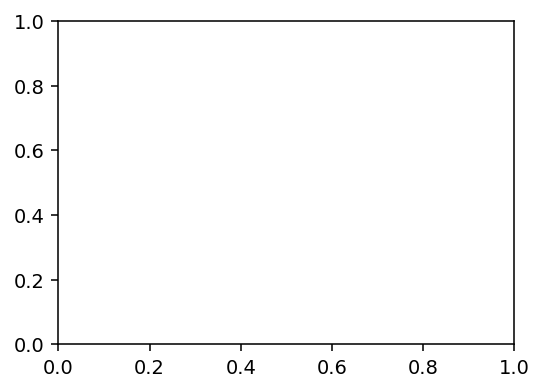

In [6]:
fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)

for col in df.columns:
    ax.plot(df_DFT.index, df_DFT[col], color='green')
ax.set_xlim(df_DFT.index.min(), df_DFT.index.max())

ax.set_ylabel('Frequency (THz)')
ax2 = ax.twinx()
ax2.set_ylabel('Frequency (cm$^{-1}$)')
ax2.set_ylim(THzToCm * np.array(ax.get_ylim()))

# beautify the labels on the x-axis
labels = path['explicit_kpoints_labels']
labels = ['$\Gamma$' if m == 'GAMMA' else m for m in labels]
labels = [m.replace('_', '$_') + '$' if '_' in m else m for m in labels]
df_path = DataFrame(dict(labels=labels,
                         positions=path['explicit_kpoints_linearcoord']))
df_path.drop(df_path.index[df_path.labels == ''], axis=0, inplace=True)
ax.set_xticks(df_path.positions)
ax.set_xticklabels(df_path.labels)
for xp in df_path.positions:
    ax.axvline(xp, color='0.8')

plt.tight_layout()